<p align="right">David Rodríguez Elipe</p>

# Logistic Regression Concept
A logistic regression is a prediction algorithm that weigths input parameteres into a single output. It is used to predict a model with multiple input data and specific output values.

$$\displaystyle Y_{i}\ \sim B(p_{i},n_{i}),{\text{ for }}i=1,\dots ,m$$
![decision function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [181]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.linear_model import LogisticRegression

<AxesSubplot:>

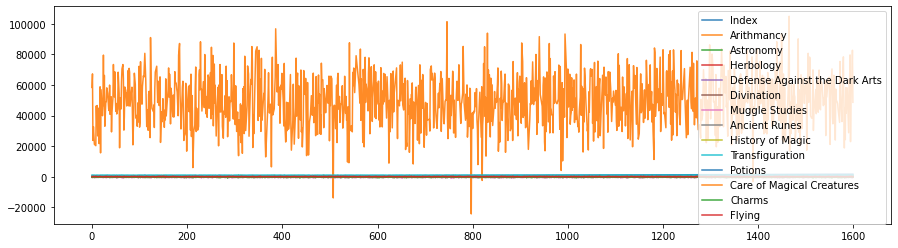

In [182]:
df = pd.read_csv('./datasets/dataset_train.csv')
df_bckp = df.copy()
df = df.dropna()
df.plot(figsize=(15,4), alpha=0.9)

# Data preprocessing
Non-numeric values need to be converted. Unnecessary features can be dropped.

In [183]:
df.iloc[0:,2:6]

,First Name,Last Name,Birthday,Best Hand
0,Tamara,Hsu,2000-03-30,Left
1,Erich,Paredes,1999-10-14,Right
2,Stephany,Braun,1999-11-03,Left
3,Vesta,Mcmichael,2000-08-19,Left
5,Corrine,Hammond,1999-04-04,Right
...,...,...,...,...
1595,Jung,Blank,2001-09-14,Right
1596,Shelli,Lock,1998-03-12,Left
1597,Benjamin,Christensen,1999-10-24,Right
1598,Charlotte,Dillon,2001-09-21,Left


In [184]:
def normalize(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

In [185]:
df

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,21209.0,-613.687160,-4.289197,6.136872,-6.592,-440.997704,396.201804,5.380286,1052.845164,11.751212,1.049894,-247.94549,-34.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Gryffindor,Jung,Blank,2001-09-14,Right,49009.0,354.280086,-4.541837,-3.542801,5.702,-497.235066,618.220213,-5.231721,964.219853,3.389086,-0.649983,-250.39401,185.83
1596,1596,Slytherin,Shelli,Lock,1998-03-12,Left,63296.0,367.531174,6.061064,-3.675312,1.757,-643.271092,445.827565,2.238112,1056.147366,5.825263,-0.333962,-246.42719,44.80
1597,1597,Gryffindor,Benjamin,Christensen,1999-10-24,Right,63905.0,544.018925,-3.203269,-5.440189,6.065,-385.150457,635.211486,-5.984257,953.866685,1.709808,0.071569,-251.63679,198.47
1598,1598,Hufflepuff,Charlotte,Dillon,2001-09-21,Left,82713.0,453.676219,3.442831,-4.536762,6.738,-831.741123,383.444937,3.813111,1087.949205,3.904100,-0.531875,-246.19072,-76.81


# Logistic Regression: applying it

In [186]:
from LogisticRegression import LogisticRegression as lr

In [187]:
houses = df['Hogwarts House'].unique()
houses

array(['Ravenclaw', 'Slytherin', 'Gryffindor', 'Hufflepuff'], dtype=object)

As we see, the date of birth doesn't seem to be a determining feature, so we can drop them.

In [188]:
df = df.drop(['Birthday','Best Hand','First Name','Last Name'], axis=1)

## Logistic Regression
Visualizing data

In [189]:
dic0 = {
    'Ravenclaw':0,
    'Slytherin':1,
    'Gryffindor':2,
    'Hufflepuff':3
}
dicrav = {
    'Ravenclaw':1,
    'Slytherin':0,
    'Gryffindor':0,
    'Hufflepuff':0
}
dicgry = {
    'Ravenclaw':0,
    'Slytherin':0,
    'Gryffindor':1,
    'Hufflepuff':0
}
dicsly = {
    'Ravenclaw':0,
    'Slytherin':1,
    'Gryffindor':0,
    'Hufflepuff':0
}
dichuf = {
    'Ravenclaw':0,
    'Slytherin':0,
    'Gryffindor':0,
    'Hufflepuff':1
}
dic2 = {
    0:'Ravenclaw',
    1:'Slytherin',
    2:'Gryffindor',
    3:'Hufflepuff'
}

In [190]:
y = np.array(df['Hogwarts House'].map(dicrav))
x = np.array(normalize(df.iloc[:,2:]))
ravenclaw = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
rav_theta = ravenclaw.fit(x,y)
ravenclaw_ypred = ravenclaw.predict(x)

In [191]:
y = np.array(df['Hogwarts House'].map(dicsly))
x = np.array(normalize(df.iloc[:,2:]))
slytherin = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
sly_theta = slytherin.fit(x,y)
slytherin_ypred = slytherin.predict(x)

In [192]:
y = np.array(df['Hogwarts House'].map(dicgry))
x = np.array(normalize(df.iloc[:,2:]))
gryffindor = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
gryffindor_theta = gryffindor.fit(x,y)
gryffindor_ypred = gryffindor.predict(x)

In [193]:
y = np.array(df['Hogwarts House'].map(dichuf))
x = np.array(normalize(df.iloc[:,2:]))
hufflepuff = lr([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
hufflepuff_theta = hufflepuff.fit(x,y)
hufflepuff_ypred = hufflepuff.predict(x)

In [194]:
result = np.c_[ravenclaw_ypred, slytherin_ypred, gryffindor_ypred,hufflepuff_ypred]

In [195]:
prediction = np.zeros(len(y)).astype(str)
for index, row in enumerate(result):
    if(index == 3):
        print(row)
    if (max(row) == row[0]):
        prediction[index] = 0
    elif (max(row) == row[1]):
        prediction[index] = 1
    elif (max(row) == row[2]):
        prediction[index] = 2
    elif (max(row) == row[3]):
        prediction[index] = 3
prediction = prediction.astype(int)

[0.55660342 0.53512768 0.59262634 0.58417827]


In [196]:
print(prediction)

[0 0 0 ... 2 3 3]


In [197]:
print(np.array(df['Hogwarts House'].map(dic0)))

[0 1 0 ... 2 3 3]


In [198]:
orig = np.array(df['Hogwarts House'].map(dic0))
pred = prediction.astype(int)
accouracy = 0
for i, value in enumerate(orig):
    if (orig[i] == pred[i]):
        accouracy +=1
accouracy = accouracy / len(pred) * 100
print('Accouracy: {:.5}%'.format(accouracy))

Accouracy: 78.977%


In [199]:
f = open("houses.csv", "w")
f.write('Index,Hogwarts House\n')
for index, n in enumerate(prediction):
    n = dic2[n]
    f.write(f'{index},{n}\n')
f.close()

In [200]:
res = pd.read_csv('houses.csv')

In [201]:
res

,Index,Hogwarts House
0,0,Ravenclaw
1,1,Ravenclaw
2,2,Ravenclaw
3,3,Gryffindor
4,4,Ravenclaw
...,...,...
1246,1246,Gryffindor
1247,1247,Hufflepuff
1248,1248,Gryffindor
1249,1249,Hufflepuff
